In [6]:
from testutils import *
from cgmbrush import *
import numpy as np
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Unit tests for some basic functions
assert (math.isclose(Rvir_den(0),50145.78368)), "Rvir_den(0) gave unexpected value"


In [8]:
# Some test data used below.
a = np.zeros((100, 100))
a[49][48] = 1
a[49][49] = 1
a[49][50] = 1
a[48][49] = 1
a[50][49] = 1

a_single_dot = np.zeros((30, 30))
a_single_dot[14][14] = 1

a_with_corner = np.zeros((30, 30))
a_with_corner[14][14] = 1
a_with_corner[14][15] = 1
a_with_corner[14][13] = 1
a_with_corner[15][14] = 1
a_with_corner[13][14] = 1
a_with_corner[1][0] = 1
a_with_corner[1][2] = 1
a_with_corner[1][1] = 1
a_with_corner[2][1] = 1
a_with_corner[0][1] = 1

b_even = np.zeros((10,10))
b_even[4][3] = 1
b_even[4][5] = 1
b_even[4][4] = 1
b_even[3][4] = 1
b_even[5][4] = 1

b_big = np.zeros((80,80))
b_big[39][39] = 1
b_big[40][39] = 1
b_big[38][39] = 1
b_big[39][40] = 1
b_big[39][38] = 1

b_odd = np.zeros((15,15))
b_odd[7][7] = 1
b_odd[7][8] = 1
b_odd[7][6] = 1
b_odd[8][7] = 1
b_odd[6][7] = 1

b_lumpy = np.zeros((20,20))
b_lumpy[11][10] = 0.1154235
b_lumpy[10][11] = 0.111363
b_lumpy[11][11] = 0.4854334

# Resolution 1 equivalent in cgmbrush
a_large = np.random.random((1024,1024))
b_random = np.random.random((20,20))

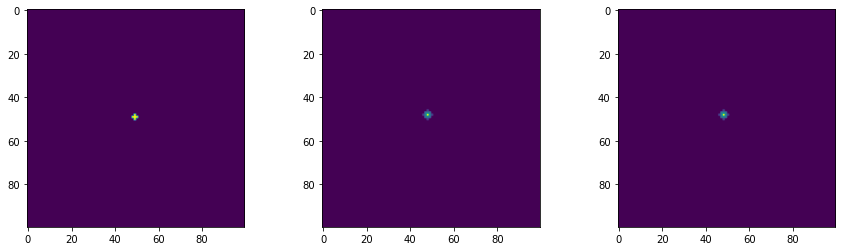

In [9]:
# Proof that my implementation is equivalent to what we did before for even sized filters
c8 = convolve(a, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

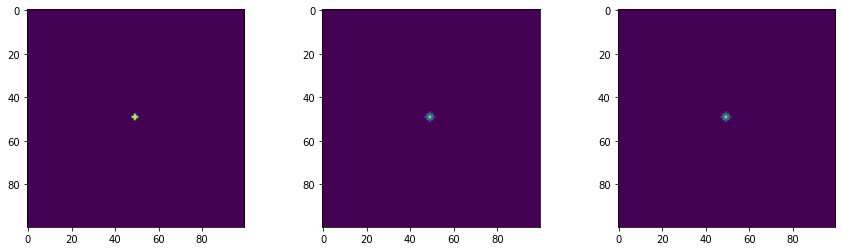

In [10]:
# Proof that my implementation is equivalent to what we did before for odd sized filters
c8 = convolve(a, b_odd, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_odd)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

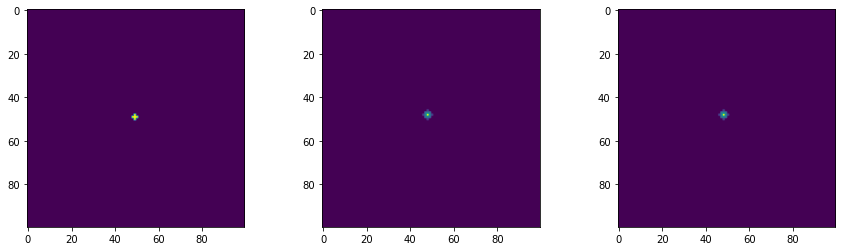

In [11]:
# Proof that my implementation is equivalent to what we did before for large masks
c8 = convolve(a, b_big, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_big)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

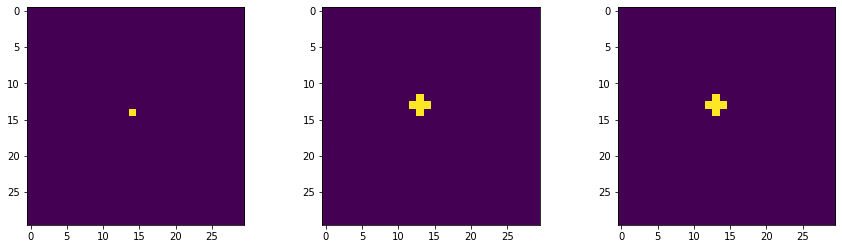

In [12]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_single_dot, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_single_dot, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_single_dot) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

assert (not np.allclose(np.zeros((30,30)), c3)), "should be false"

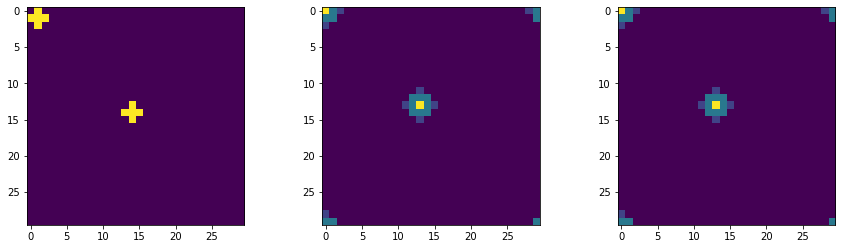

In [13]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_with_corner, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_with_corner, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_with_corner) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

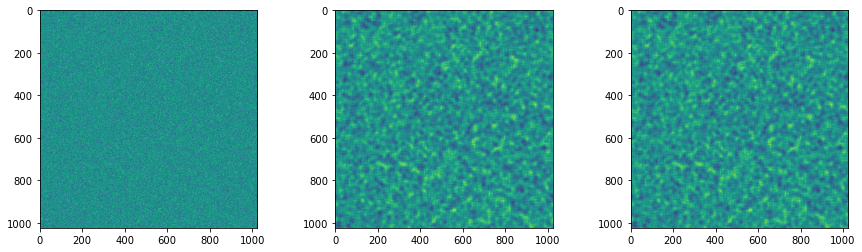

In [14]:
# Proof that my implementation is equivalent to what we did before when stuff both imputs are random values
c8 = convolve(a_large, b_random, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_random)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

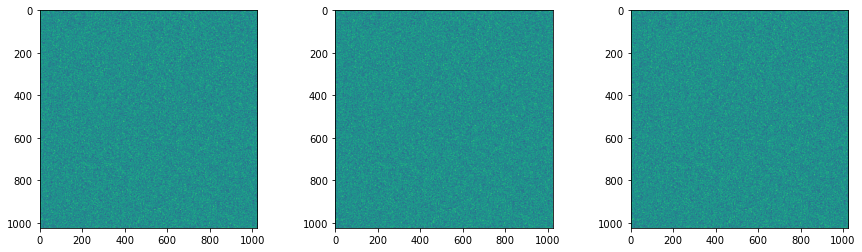

In [15]:
# Proof that my implementation is equivalent to what we did before for lumpy mask
c8 = convolve(a_large, b_lumpy, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_lumpy)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

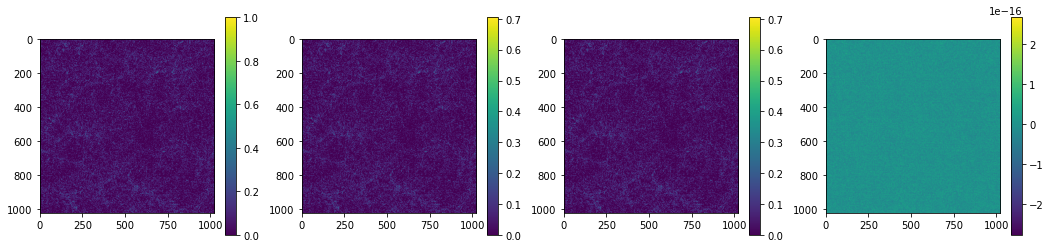

In [16]:
a = np.load('test/problem halos.npy', allow_pickle=True)
b = np.load('test/problem mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap')
c3 = my_convolve(a, b)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

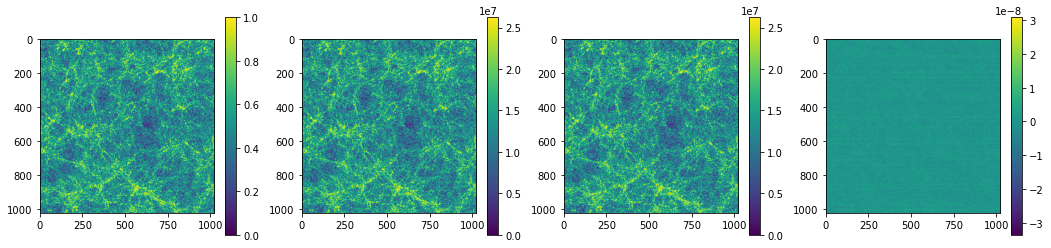

In [17]:
a = np.load('test/problem 2 halos.npy', allow_pickle=True)
b = np.load('test/problem 2 mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap') 
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but that's ok
assert (np.allclose(c8, c3, atol=1e-07)), "test failed"



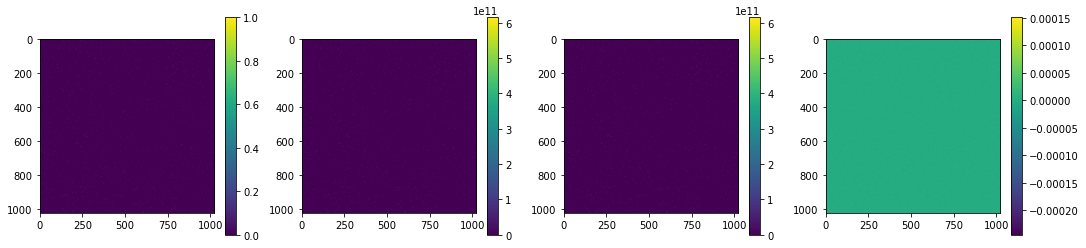

In [18]:
a = np.load('test/problem 3 halos.npy', allow_pickle=True)
b = np.load('test/problem 3 mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap')
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but it's only because all the numbers are larger in this example
assert (np.allclose(c8, c3, atol=1e-03)), "test failed"



Profile: tophat
Performing Calculations for tophat1_256_2021-10-05


Exception: Test failed for profile 'tophat'. Final density grid has changed at redshift 0.

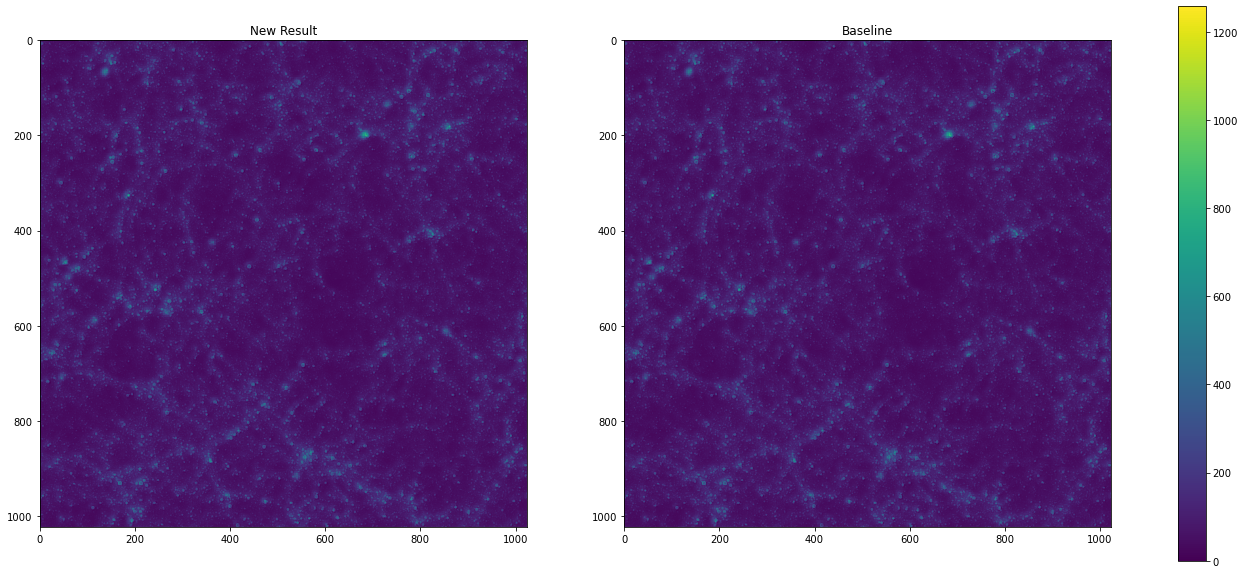

In [19]:
# Regression Testing for hist_profile
# The idea here is to baseline some so one can ensure that future changes to the code do not change the results (up to a tolerance)from cgmbrush import *
from testutils import *
from cgmbrush import *
REWRITE_BASELINES = False
filename_header = "baseline_e2e_%s"
profiles = [TophatProfile(), SphericalTophatProfile(), NFWProfile(), FireProfile(), PrecipitationProfile(), MassDependentProfile(SphericalTophatProfile(extra=2), NFWProfile(), 1e12)]

for profile in profiles:
    print("Profile: %s" % profile.name)
    config = Configuration(profile, 1, resolution=1, provider=BolshoiProvider())

    config.run()
    results = config.results # histograms, halos-readded field, halo addition masks, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses
    check_validity(results)

    if REWRITE_BASELINES:
        saveResults(filename_header % profile.name, **results, folder=testFolder)
    else:
        baseline = loadResults(filename_header % profile.name, folder=testFolder)

        # Most important: test the final density grid values
        for i in range(len(config.RS_array)):
            test_pass = np.allclose(results['final_density_field'][i], baseline['final_density_field'][i], rtol=1e-12, atol=1e-3)
            if not test_pass:
                plot_grid_comparison(results['final_density_field'][i], baseline['final_density_field'][i])
                raise Exception("Test failed for profile '{}'. Final density grid has changed at redshift {}.".format(profile.name, config.RS_array[i]))
        
        # Test all the addition masks across all mass bins
        test_pass = np.allclose(results['add_masks'], baseline['add_masks'], rtol=1e-12, atol=1e-3)
        if not test_pass:
            raise Exception("Test failed for profile '%s'. Addition masks have changed." % profile.name)

        # Not testing histograms, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses.

        if not test_pass:
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")


[0, 3080, 4069, 4332, 4373, 4375, 4375, 4375, 4375, 4375]
Performing Calculations for STH1_256_2021-10-05


Exception: Test failed for profile 'STH'. Final density grid has changed at redshift 0.

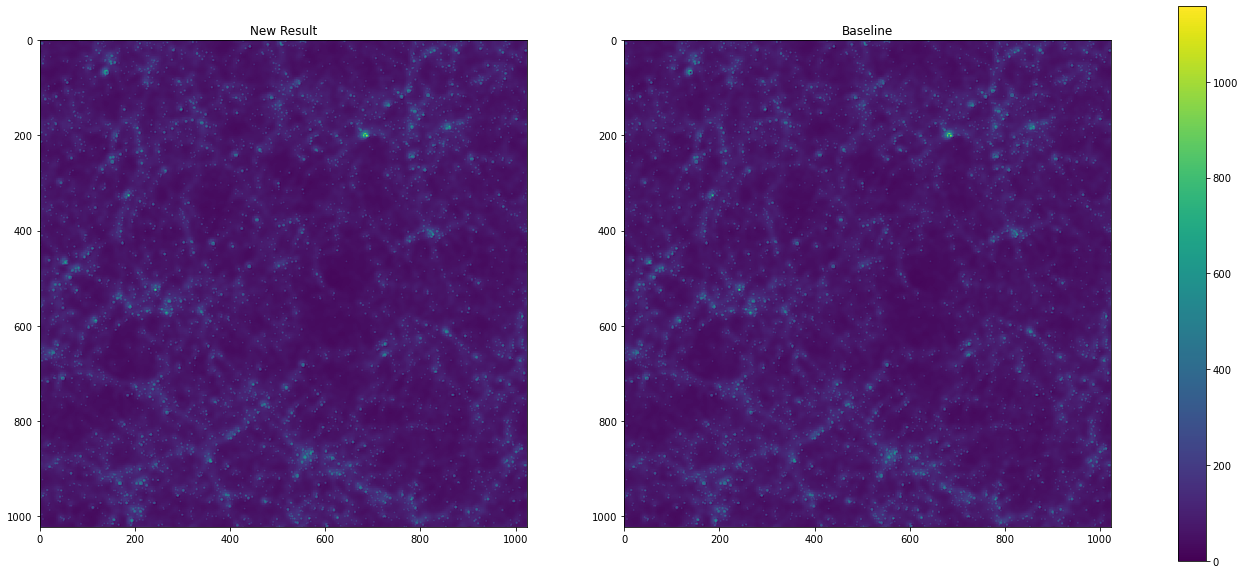

In [1]:
# Test that the convolution code handles empty mass bins correctly
from testutils import *
from cgmbrush import *
REWRITE_BASELINES = False
filename_header = "baseline_e2e_emptybins"
profile = SphericalTophatProfile()

min_mass = 1E13
max_mass = 1E17 # making it large so we get empty bins
log_bins = 10
provider = BolshoiProvider()
df, bins = create_halo_array_for_convolution(provider.get_halos(0), min_mass, max_mass, log_bins)
print(bins)
assert len(bins) == log_bins, "{} bins were requested, got {}".format(log_bins, len(bins))

config = Configuration(profile, 1, resolution=1, provider=provider)
config.min_mass = min_mass
config.max_mass = max_mass
config.log_bins = log_bins

config.run()
results = config.results # histograms, halos-readded field, halo addition masks, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses
check_validity(results)

if REWRITE_BASELINES:
    saveResults(filename_header, **results, folder=testFolder)
else:
    baseline = loadResults(filename_header, folder=testFolder)

    # Most important: test the final density grid values
    for i in range(len(config.RS_array)):
        test_pass = np.allclose(results['final_density_field'][i], baseline['final_density_field'][i], rtol=1e-12, atol=1e-3)
        if not test_pass:
            plot_grid_comparison(results['final_density_field'][i], baseline['final_density_field'][i])
            raise Exception("Test failed for profile '{}'. Final density grid has changed at redshift {}.".format(profile.name, config.RS_array[i]))
    
    # Test all the addition masks across all mass bins
    test_pass = np.allclose(results['add_masks'], baseline['add_masks'], rtol=1e-12, atol=1e-3)
    if not test_pass:
        raise Exception("Test failed for profile '%s'. Addition masks have changed." % profile.name)

    # Not testing histograms, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses.

    if not test_pass:
        raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")


Profile: tophat
Profile: STH
Profile: NFW
Addition masks changed.
Mask 1 changed.
Values of center pixel:
 New:		 31.14872643025338
 Baseline:	 31.358955400425774
[False, True, False, True]


Exception: Test failed for profile 'NFW'

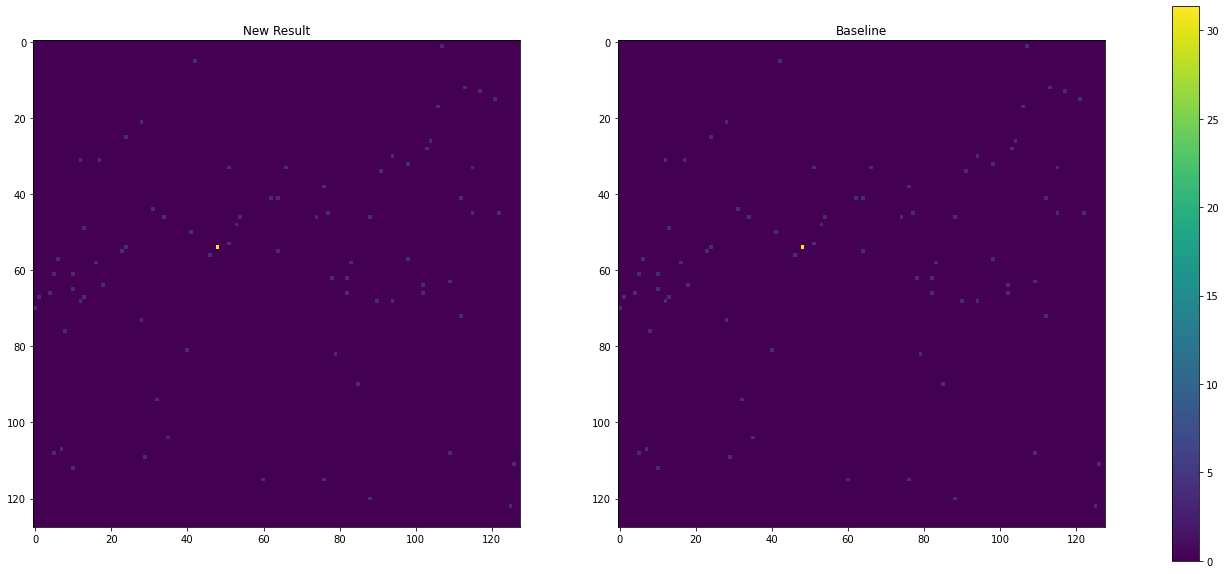

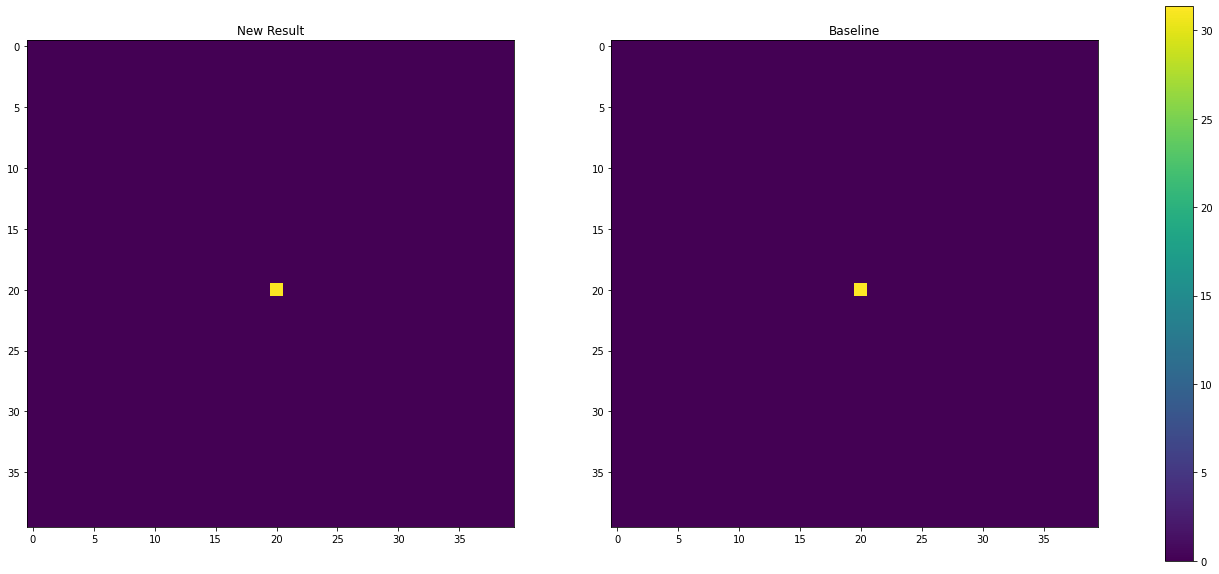

In [20]:
# Regression Testing for add_halos
# The idea here is to baseline some so one can ensure that future changes to the code do not change the results (up to a tolerance)
from testutils import *
from cgmbrush import *
import numpy as np

REWRITE_BASELINES = False
filename_header = "baseline_add_%s"

provider = BolshoiProvider()
halos = provider.get_halos(0).head(80)
df, bins = create_halo_array_for_convolution(halos, 1E9, 10**(15), 4)
profiles = [TophatProfile(), SphericalTophatProfile(), NFWProfile(), FireProfile(), PrecipitationProfile(), MassDependentProfile(SphericalTophatProfile(extra=2), NFWProfile(), 1e11)]

for profile in profiles:
    print("Profile: %s" % profile.name)
    resolution = 2
    results = add_halos(df, resolution, bins, profile, 1, 0)

    if REWRITE_BASELINES:
        saveArray(filename_header % profile.name, *results, folder=testFolder)
    else:
        baseline = loadArray(filename_header % profile.name, folder=testFolder)
        test_pass = [np.allclose(results[i], baseline[i], rtol=1e-10, atol=1e-3) for i in range(4)]

        if not test_pass[0]: # zoom in on the region where the 80 chosen halos are
            plot_grid_comparison(results[0][0:128, 0:128], baseline[0][0:128, 0:128])

        if not test_pass[1]:
            print("conv_rad changed.")
            print("New Result: {}".format(results[1]))
            print("Baseline: {}".format(baseline[1]))

        if not test_pass[2]:
            print("Addition masks changed.")
            compare_mask_lists(results[2], baseline[2], resolution)

        if not test_pass[3]:
            print("Mvir_avg changed.")
            print("New Result: {}".format(results[3]))
            print("Baseline: {}".format(baseline[3]))

        if not all(test_pass):
            print(test_pass)
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")



In [1]:
# create_halo_array_for_convolution and add_halos test
# Test that when a bin is empty (repeated values in bins) the code works still.
from cgmbrush import *

provider = BolshoiProvider()
halos = provider.get_halos(0).head(80)
df, bins = create_halo_array_for_convolution(halos, 1E9, 10**(15), 4)
print("Halos in use: %s " % len(df))
print(bins)
assert len(bins) == 4, "4 bins dividers (3 bins) were requested"

results = add_halos(df, 1, bins, TophatProfile(), 1, 0)
fig, ax = plt.subplots(1,1,figsize=(8, 8))
pos = ax.imshow(results[0][0:80, 0:80])
fig.colorbar(pos, ax=ax)
fig.show()
# No errors or warnings = pass


Halos in use: 80 
[0, 79, 80, 80]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


In [5]:
# Subtract Halos Regression Tests
from cgmbrush import *
import numpy as np

REWRITE_BASELINES = False
filename_header = "baseline_subtract_%s"

provider = BolshoiProvider()
halos = provider.get_halos(0)
df, bins = create_halo_array_for_convolution(halos, 1E10, 10**(15), 30)
profiles = [ TophatProfile(), SphericalTophatProfile(), NFWProfile() ]

for profile in profiles:
    print("Profile: %s" % profile.name)
    resolution = 1 # Not Used!
    scaling_radius = 1
    redshift = 0
    results = subtract_halos(df, resolution, bins, profile, scaling_radius, redshift)

    if REWRITE_BASELINES:
        saveArray(filename_header % profile.name, results, folder=testFolder)
    else:
        baseline = loadArray(filename_header % profile.name, folder=testFolder)
        test_pass = np.allclose(results, baseline, rtol=1e-15, atol=1e-1)

        if not test_pass:
            plot_grid_comparison(results, baseline)
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")

Profile: tophat
Profile: STH
Profile: NFW
